##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member Name -** ARJUN LAKHANPAL
##### **Task -** 1


**Project Description:**

The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

**Objective:**

The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

**Key Project Details:**

- Iris flowers have three species: setosa, versicolor, and virginica.
- These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.
- The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.
- The trained model will classify iris flowers into one of the three species based on their measurements.

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task1/main/Iris.csv")

### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


### Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### What did i know about the dataset?

* The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
* There are 150 rows and 6 columns provided in the data.
* No duplicate values exist.
* No Null values exist.

In [ ]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [ ]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [ ]:
# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Chart - 1 : Distribution of Numerical Variables

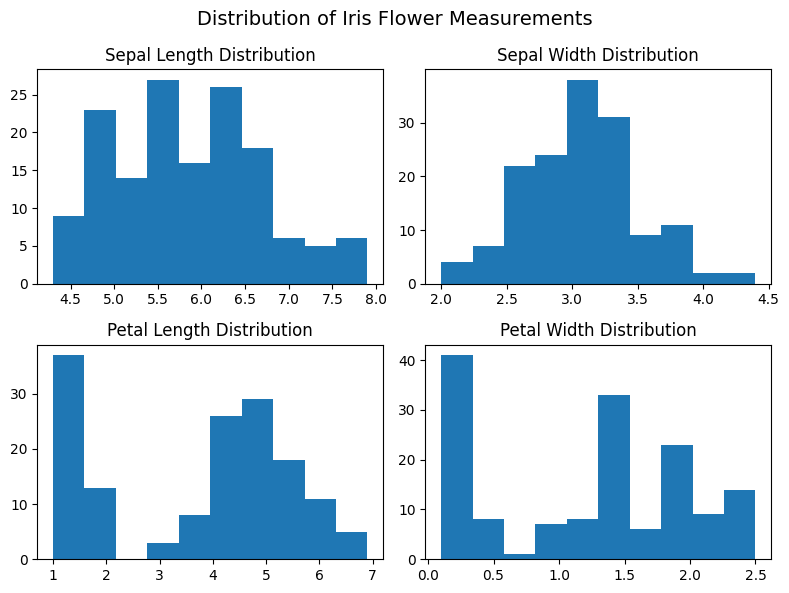

In [ ]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

#### Chart - 2 : Sepal Length vs Sepal Width

In [ ]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

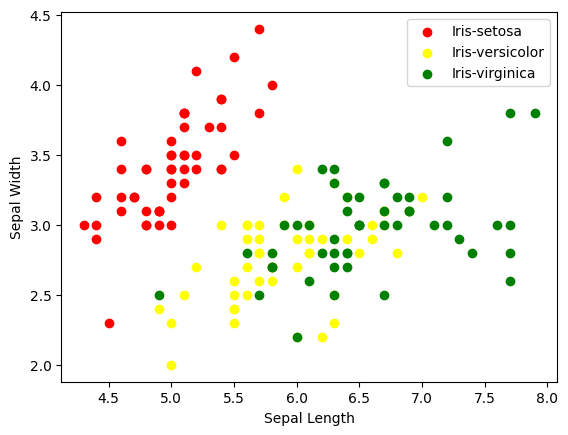

In [ ]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 3 : Petal Length vs Petal Width

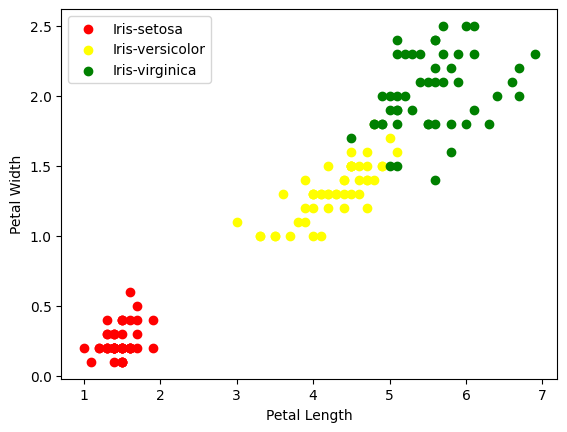

In [ ]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 4 : Sepal Length vs Petal Length

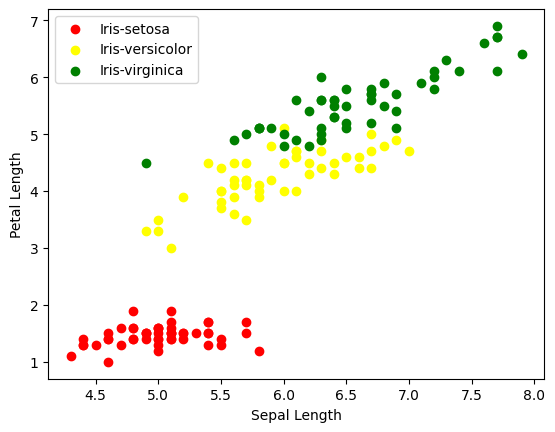

In [ ]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 5 : Sepal Width vs Petal Width

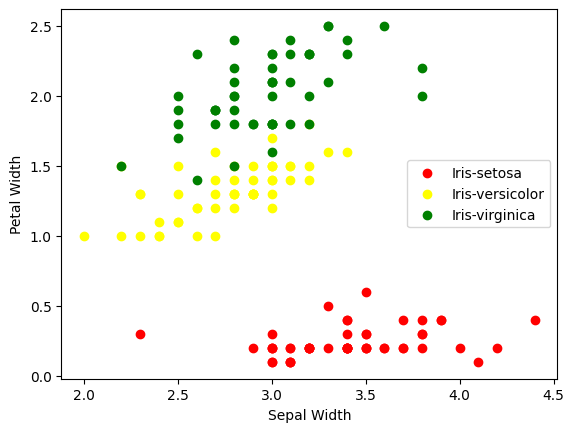

In [ ]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 6 : Correlation Heatmap

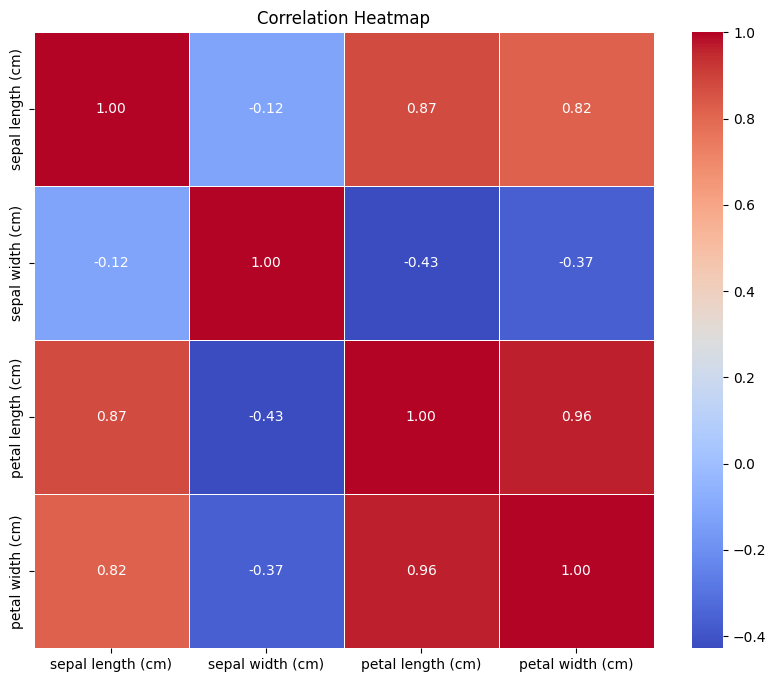

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

# Convert the data to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the data to a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable ('species') to the DataFrame
df['Species'] = iris.target  # This is already encoded, no need for LabelEncoder

# Check the unique encoded species values
unique_species = df['Species'].unique()

print("Encoded Species Values:")
print(unique_species)  # Output will be an array: [0 1 2] where 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica


Encoded Species Values:
[0 1 2]


### 2. Data Scaling

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the data to a DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable ('species') to the DataFrame
data['Species'] = iris.target

# Define X (features) and y (target)
X = data.drop(columns=['Species'], axis=1)
y = data['Species']


### 3. Data Splitting

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the data to a DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable ('species') to the DataFrame
data['Species'] = iris.target

# Define X (features) and y (target)
x = data.drop(columns=['Species'], axis=1)
y = data['Species']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Verify the shapes of the resulting splits
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (105, 4)
x_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Species,
1,37
2,37
0,31


## ***6. ML Model Implementation***

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Train the model (fit)
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(x_test)

# Evaluate the model's performance

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


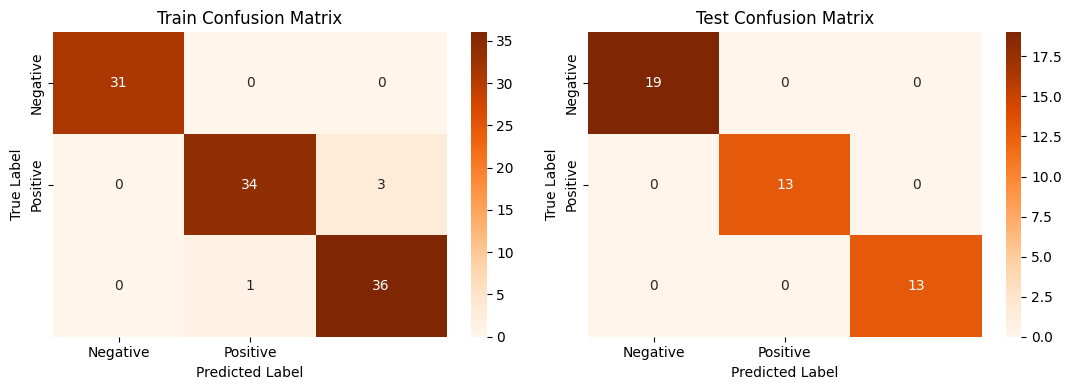


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.964835 | 0.963964 |   0.963938 | 105        |
| weighted avg |    0.962826 | 0.961905 |   0.961877 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.962826
Precision Test,1.000000
Recall Train,0.961905
Recall Test,1.000000
Accuracy Train,0.961905
Accuracy Test,1.000000
F1 macro Train,0.961877
F1 macro Test,1.000000


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' support 'l1' penalty
}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated Stratified K-Fold Cross Validation
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf, n_jobs=-1)  # Use all available CPUs for faster fitting
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


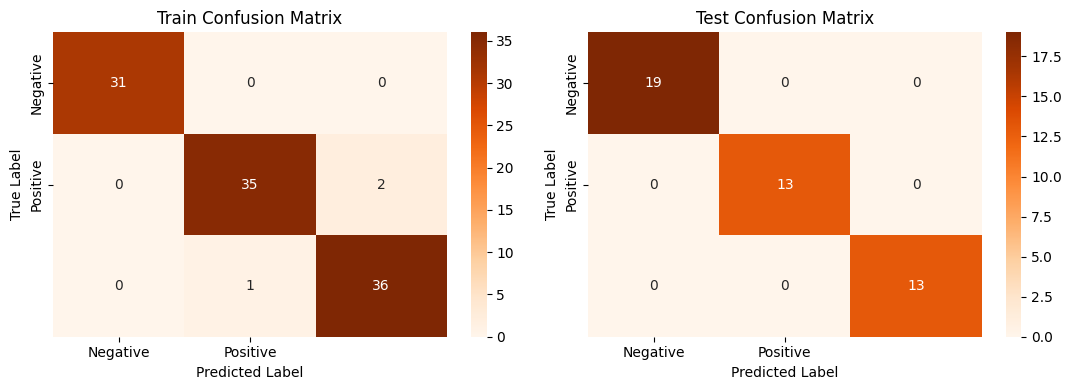


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.972222 | 0.945946 |   0.958904 |  37        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.973197 | 0.972973 |   0.972968 | 105        |
| weighted avg |    0.971665 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.962826,0.971665
Precision Test,1.000000,1.000000
Recall Train,0.961905,0.971429
Recall Test,1.000000,1.000000
Accuracy Train,0.961905,0.971429
Accuracy Test,1.000000,1.000000
F1 macro Train,0.961877,0.971423
F1 macro Test,1.000000,1.000000


It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Logistic Regression models.

### ML Model - 2 : Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=20)

# Train the model (fit) on the training data
dt_model.fit(x_train, y_train)

# Predict using the trained model
y_pred = dt_model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


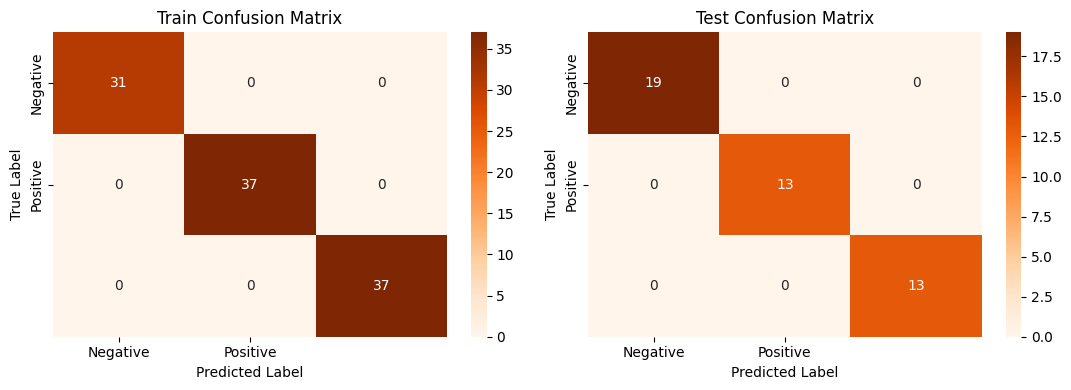


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.962826,0.971665,1.0
Precision Test,1.000000,1.000000,1.0
Recall Train,0.961905,0.971429,1.0
Recall Test,1.000000,1.000000,1.0
Accuracy Train,0.961905,0.971429,1.0
Accuracy Test,1.000000,1.000000,1.0
F1 macro Train,0.961877,0.971423,1.0
F1 macro Test,1.000000,1.000000,1.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


In [ ]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


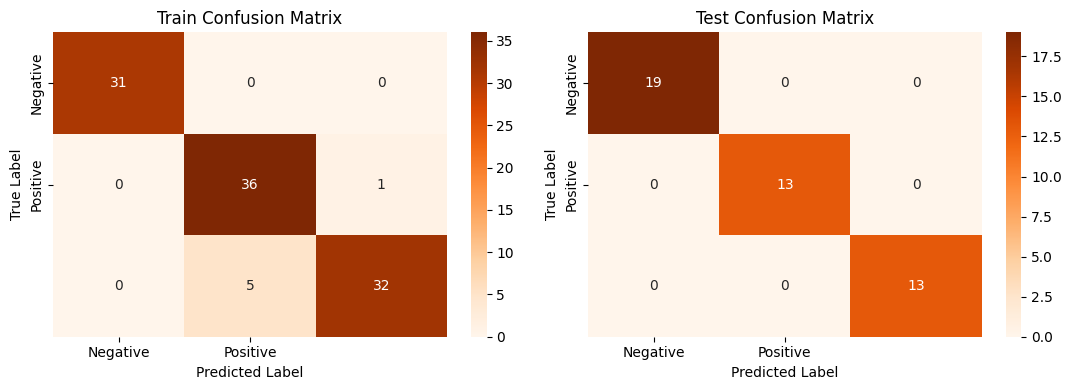


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.878049 | 0.972973 |   0.923077 |  37        |
| 2            |    0.969697 | 0.864865 |   0.914286 |  37        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.949249 | 0.945946 |   0.945788 | 105        |
| weighted avg |    0.946349 | 0.942857 |   0.94269  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.962826,0.971665,1.0,0.946349
Precision Test,1.000000,1.000000,1.0,1.000000
Recall Train,0.961905,0.971429,1.0,0.942857
Recall Test,1.000000,1.000000,1.0,1.000000
Accuracy Train,0.961905,0.971429,1.0,0.942857
Accuracy Test,1.000000,1.000000,1.0,1.000000
F1 macro Train,0.961877,0.971423,1.0,0.942690
F1 macro Test,1.000000,1.000000,1.0,1.000000


It appears that hyperparameter tuning didn't improved the performance of the Decision Tree model on the test set. The precision, recall, accuracy and F1 scores on the test set are less for the tuned Decision Tree model compare to the untuned Decision Tree model.

The tuned model is not overfitting like the untuned model.

### ML Model - 3 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)

# Train the model (fit) on the training data
rf_model.fit(x_train, y_train)

# Predict using the trained model
y_pred = rf_model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


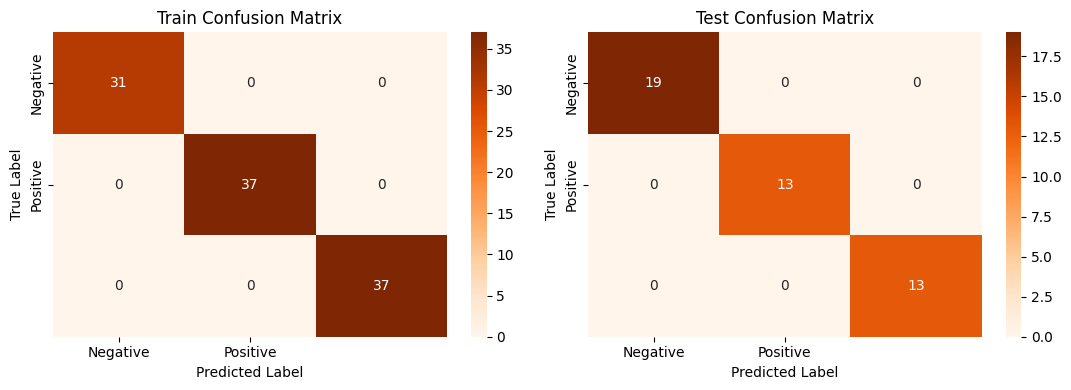


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.962826,0.971665,1.0,0.946349,1.0
Precision Test,1.000000,1.000000,1.0,1.000000,1.0
Recall Train,0.961905,0.971429,1.0,0.942857,1.0
Recall Test,1.000000,1.000000,1.0,1.000000,1.0
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 3, 4, 5]
}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated Stratified KFold cross-validation setup
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(rf, param_distributions=grid, n_iter=10, cv=rskf, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'n_estimators': 10, 'min_samples_split': 4, 'max_depth': 10}


In [ ]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


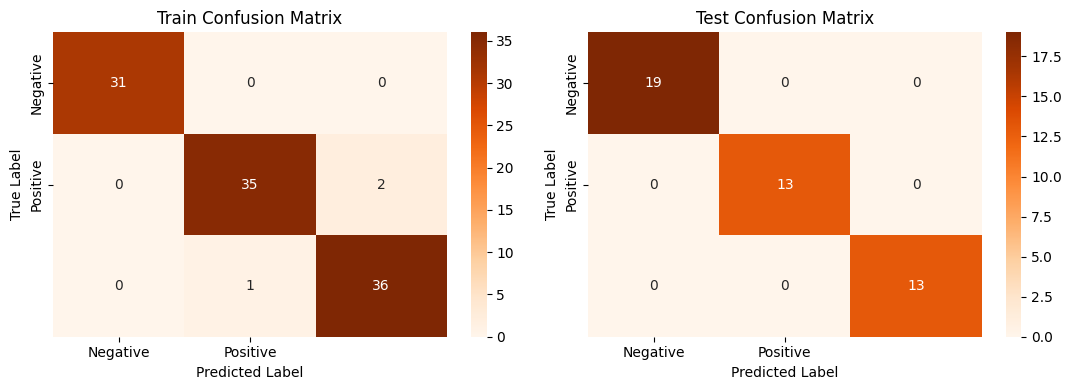


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.972222 | 0.945946 |   0.958904 |  37        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.973197 | 0.972973 |   0.972968 | 105        |
| weighted avg |    0.971665 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique i used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000


It appears that hyperparameter tuning improved the performance of the Random Forest model on the train set. But the precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Random Forest models.

### ML Model - 4 : SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Support Vector Machine (SVM) model with a linear kernel
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Train the model using the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


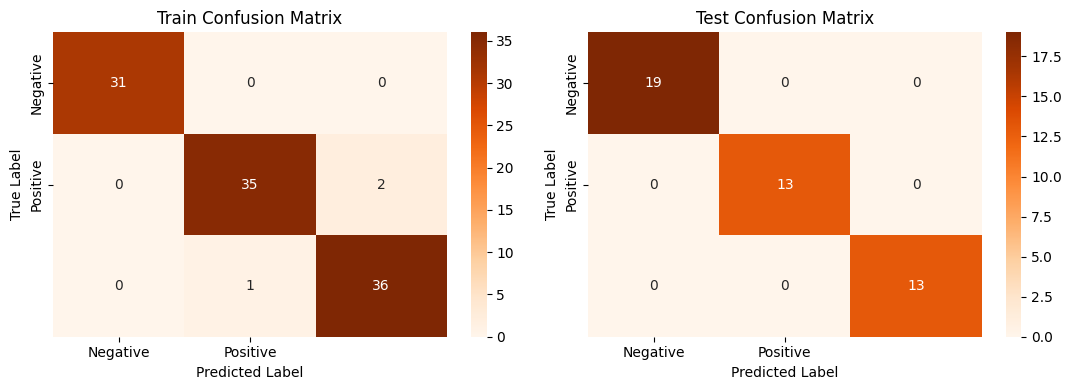


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.972222 | 0.945946 |   0.958904 |  37        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.973197 | 0.972973 |   0.972968 | 105        |
| weighted avg |    0.971665 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'poly', 'degree': np.int64(2), 'C': np.float64(7.7)}


In [ ]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


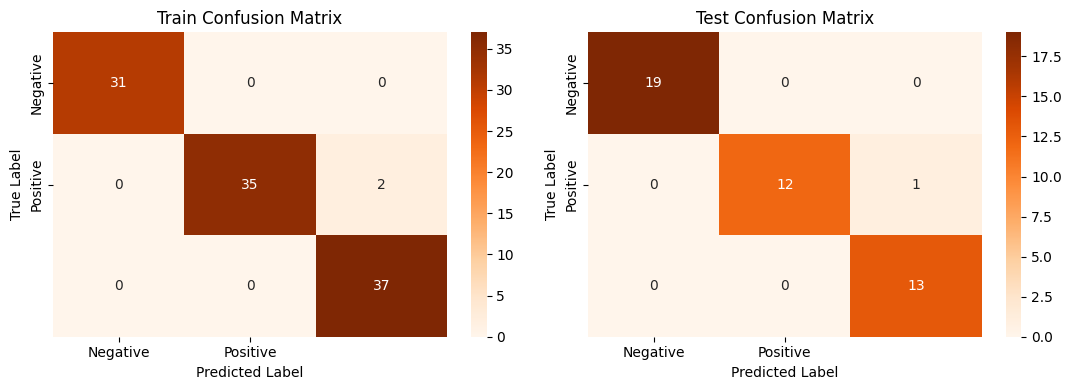


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    1        | 0.945946 |   0.972222 |  37        |
| 2            |    0.948718 | 1        |   0.973684 |  37        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982906 | 0.981982 |   0.981969 | 105        |
| weighted avg |    0.981929 | 0.980952 |   0.980938 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 19        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['SVM tuned'] = svm2_score

##### Which hyperparameter optimization technique have i used and why?

 Here Randomized search is used as a hyperparameter optimization technique.
 Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665,0.981929
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.979365
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423,0.980938
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977745


It appears that hyperparameter tuning did not improve the performance of the SVM model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned SVM models.

### ML Model - 5 : Xtreme Gradient Boosting

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0)

# Train the model on the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


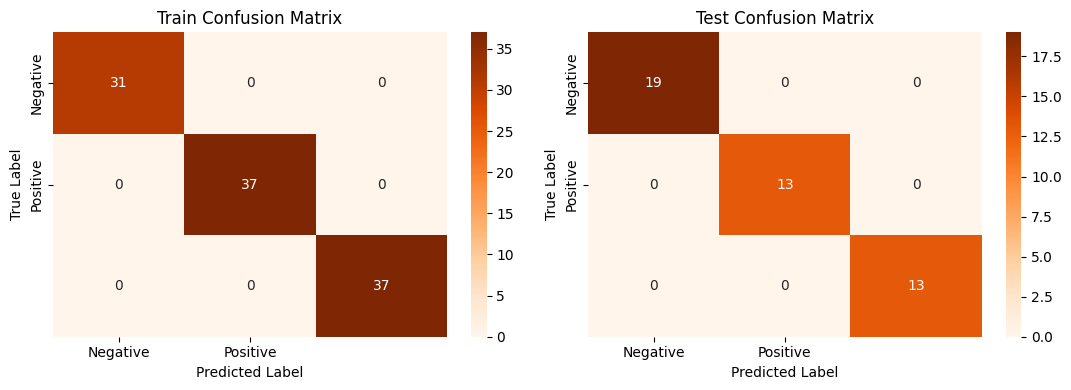


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [ ]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665,0.981929,1.0
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.979365,1.0
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423,0.980938,1.0
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977745,1.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(110), 'max_depth': np.int64(13), 'learning_rate': np.float64(0.09)}


In [ ]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


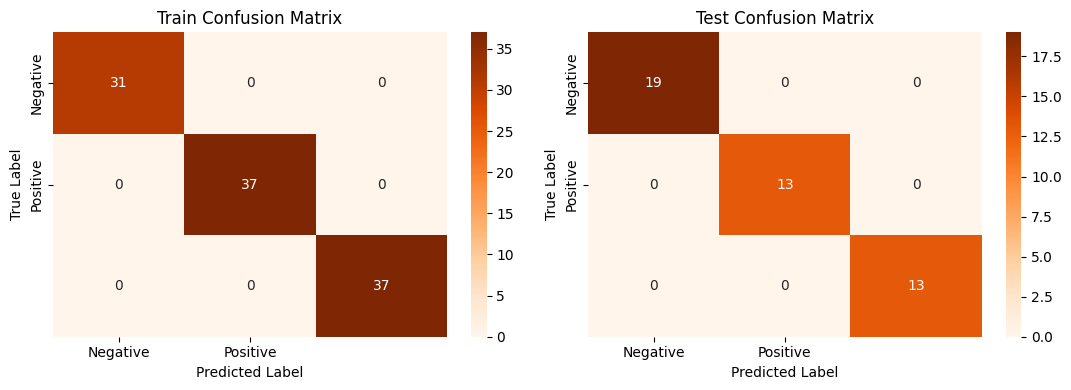


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [ ]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['XGB tuned'] = xgb2_score

##### Which hyperparameter optimization technique have i used and why?

Here we have used Randomized search to tune the XGB model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665,0.981929,1.0
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.979365,1.0
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423,0.980938,1.0
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977745,1.0


It appears that hyperparameter tuning did not improve the performance of the XGBoost model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both the untuned and tuned XGBoost models.

### ML Model - 6 : Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


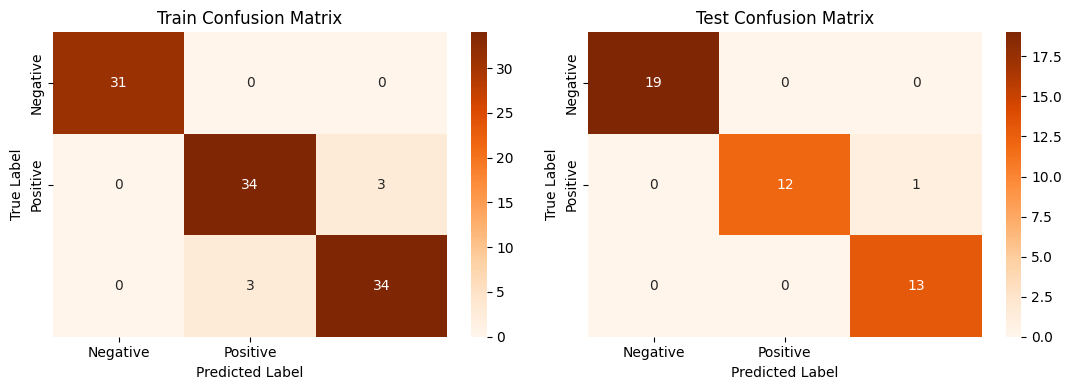


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.918919 | 0.918919 |   0.918919 |  37        |
| 2            |    0.918919 | 0.918919 |   0.918919 |  37        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.945946 | 0.945946 |   0.945946 | 105        |
| weighted avg |    0.942857 | 0.942857 |   0.942857 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 19        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665,0.981929,1.0,0.942857
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.979365,1.0,0.979365
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0,0.942857
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0,0.977778
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0,0.942857
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0,0.977778
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423,0.980938,1.0,0.942857
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977745,1.0,0.977745


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.02310129700083159)}


In [ ]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


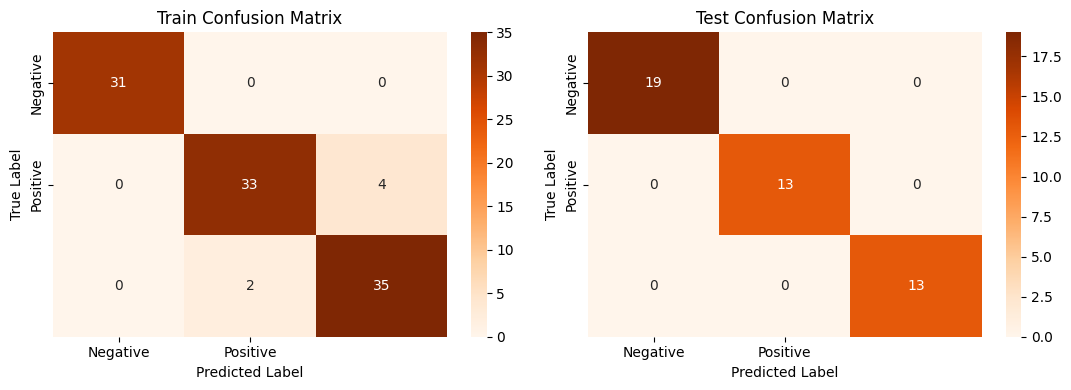


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.942857 | 0.891892 |   0.916667 |  37        |
| 2            |    0.897436 | 0.945946 |   0.921053 |  37        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.946764 | 0.945946 |   0.945906 | 105        |
| weighted avg |    0.943722 | 0.942857 |   0.942815 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Naive Bayes tuned']= nb2_score

##### Which hyperparameter optimization technique have i used and why?

Here we have used the GridSearchCV for optimization of the Naive Bayes model.

GridSearchCV is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. GridSearchCV can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes,Naive Bayes tuned
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665,0.981929,1.0,0.942857,0.943722
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.979365,1.0,0.979365,1.000000
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0,0.942857,0.942857
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0,0.977778,1.000000
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0,0.942857,0.942857
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0,0.977778,1.000000
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423,0.980938,1.0,0.942857,0.942815
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977745,1.0,0.977745,1.000000


It appears that hyperparameter tuning did not improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has precision, recall, accuracy and F1 score on the test set as same as in the untuned Naive Bayes model.

### ML Model - 7 : Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the MLPClassifier (Multi-layer Perceptron)
nn_model = MLPClassifier(random_state=0, max_iter=1000)

# Train the model on the training data
nn_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nn_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


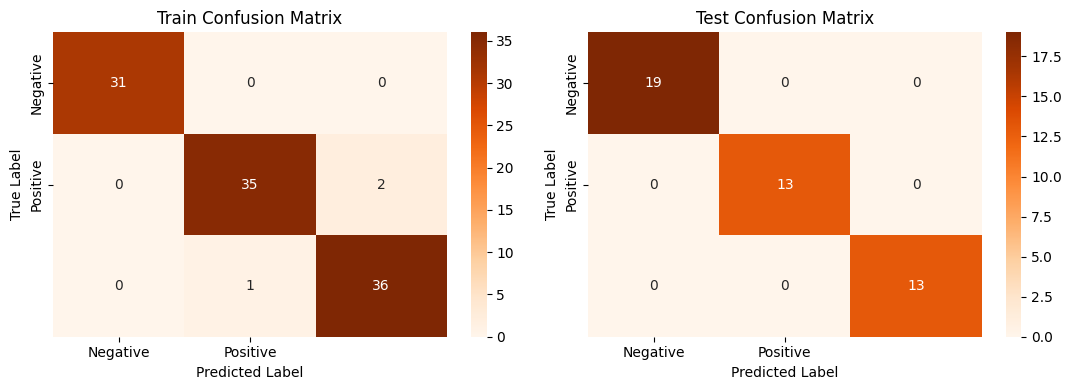


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.972222 | 0.945946 |   0.958904 |  37        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.973197 | 0.972973 |   0.972968 | 105        |
| weighted avg |    0.971665 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.962826,0.971665,1.0,0.946349,1.0,0.971665,0.971665,0.981929,1.0,0.942857,0.943722,0.971665
Precision Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.979365,1.0,0.979365,1.000000,1.000000
Recall Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0,0.942857,0.942857,0.971429
Recall Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0,0.977778,1.000000,1.000000
Accuracy Train,0.961905,0.971429,1.0,0.942857,1.0,0.971429,0.971429,0.980952,1.0,0.942857,0.942857,0.971429
Accuracy Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977778,1.0,0.977778,1.000000,1.000000
F1 macro Train,0.961877,0.971423,1.0,0.942690,1.0,0.971423,0.971423,0.980938,1.0,0.942857,0.942815,0.971423
F1 macro Test,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.977745,1.0,0.977745,1.000000,1.000000


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': np.int64(90), 'alpha': np.float64(0.0061)}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Confusion Matrix:


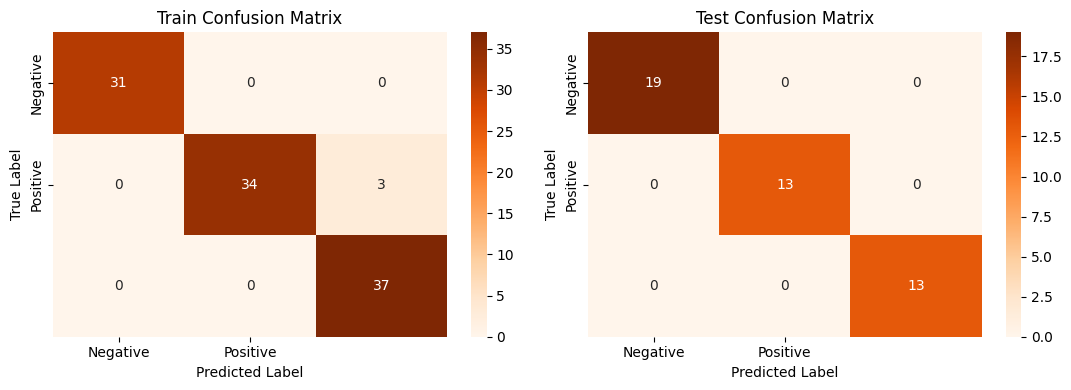


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    1        | 0.918919 |   0.957746 |  37        |
| 2            |    0.925    | 1        |   0.961039 |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.975    | 0.972973 |   0.972928 | 105        |
| weighted avg |    0.973571 | 0.971429 |   0.971382 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Neural Network tuned']= neural2_score

##### Which hyperparameter optimization technique have i used and why?

Here we have used Randomized search to tune the Neural Network model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

It appears that hyperparameter tuning improve the performance of the neural network model on the test set. The precision, recall, accuracy and F1 scores on the test set are increased for the tuned neural network model compare to untuned neural network model.

In [ ]:
print(score.to_markdown())

## ***Selection of best model***

In [ ]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.962826,1.000000,0.961905,1.000000,0.961905,1.000000,0.961877,1.000000
Logistic regression tuned,0.971665,1.000000,0.971429,1.000000,0.971429,1.000000,0.971423,1.000000
Decision Tree tuned,0.946349,1.000000,0.942857,1.000000,0.942857,1.000000,0.942690,1.000000
Random Forest tuned,0.971665,1.000000,0.971429,1.000000,0.971429,1.000000,0.971423,1.000000
SVM,0.971665,1.000000,0.971429,1.000000,0.971429,1.000000,0.971423,1.000000
Naive Bayes,0.942857,0.979365,0.942857,0.977778,0.942857,0.977778,0.942857,0.977745
Naive Bayes tuned,0.943722,1.000000,0.942857,1.000000,0.942857,1.000000,0.942815,1.000000
Neural Network,0.971665,1.000000,0.971429,1.000000,0.971429,1.000000,0.971423,1.000000
Neural Network tuned,0.973571,1.000000,0.971429,1.000000,0.971429,1.000000,0.971382,1.000000


In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression - 1.0
Recall: Logistic regression - 1.0
Accuracy: Logistic regression - 1.0
F1 macro: Logistic regression - 1.0


In [ ]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.961905 |      1        |
| Logistic regression tuned |       0.971429 |      1        |
| Decision Tree tuned       |       0.942857 |      1        |
| Random Forest tuned       |       0.971429 |      1        |
| SVM                       |       0.971429 |      1        |
| Naive Bayes               |       0.942857 |      0.977778 |
| Naive Bayes tuned         |       0.942857 |      1        |
| Neural Network            |       0.971429 |      1        |
| Neural Network tuned      |       0.971429 |      1        |


### 1. Which Evaluation metrics did i consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our Iris flower classification model. This means that our goal is to maximize the number of true positives (correctly identified the different iris flowers) while minimizing the number of false negatives (incorrectly identified the flowers not a iris flower). By doing so, we aim to ensure that we correctly identify as many different iris flowers, even if it means that we may have some false positives.

### 2. Which ML model did i choose from the above created models as our final prediction model and why?

After evaluating the performance of several machine learning models on the Iris dataset, I have selected the tuned Random Forest as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify different iris flowers. In our analysis, we found that the Random Forest (tuned) had the highest recall score among the models we evaluated.

I choose recall as the primary evaluation metric because correctly identifying different iris flowers are critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many different iris flowers as possible, even if it means that we may have some false positives. Overall, we believe that the Random Forest (tuned) is the best choice for our needs and will help us achieve a positive business impact.

### 3. Explain the model which i have used for the prediction

In [ ]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [ ]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Conclusion**

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

6. **Practical Application:** The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.